In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [2]:
df=pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df1=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df['Age'].nunique()

68

(array([1032., 1043., 1047.,  872.,  960., 1058.,  917., 1007., 1090.,
         974.]),
 array([18. , 24.7, 31.4, 38.1, 44.8, 51.5, 58.2, 64.9, 71.6, 78.3, 85. ]),
 <BarContainer object of 10 artists>)

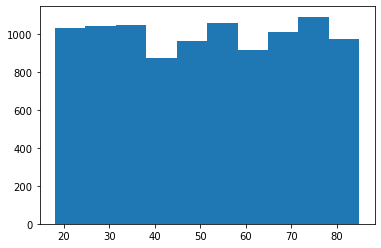

In [7]:
plt.hist(df['Age'])

<AxesSubplot:xlabel='Blood Type', ylabel='count'>

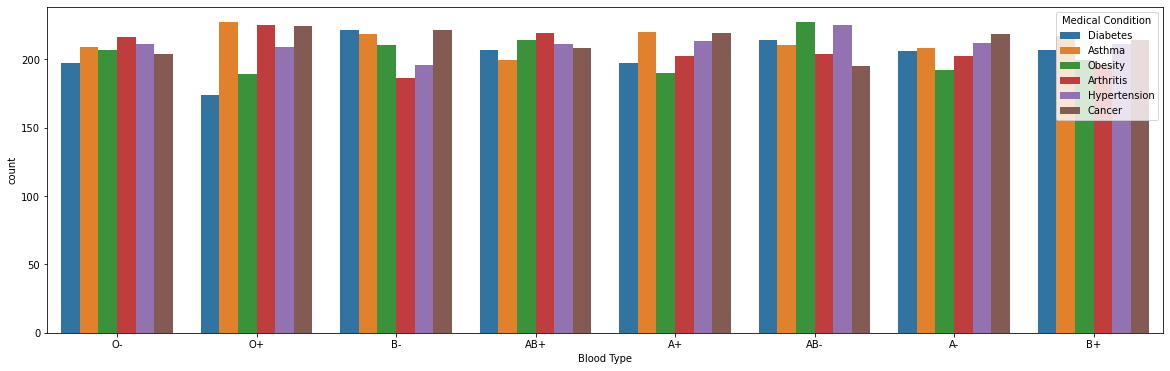

In [8]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(x=df['Blood Type'],hue=df['Medical Condition'])


<AxesSubplot:xlabel='Medical Condition', ylabel='count'>

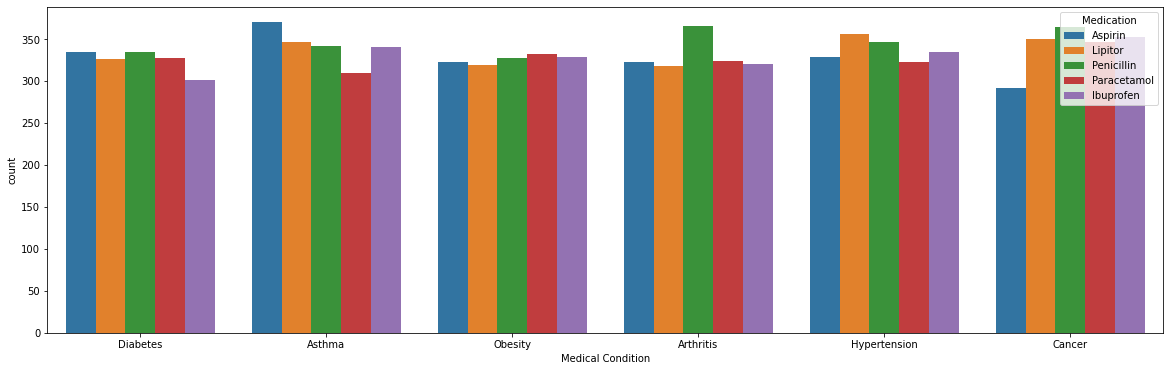

In [9]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(x=df['Medical Condition'],hue=df['Medication'])

<AxesSubplot:xlabel='Medical Condition', ylabel='count'>

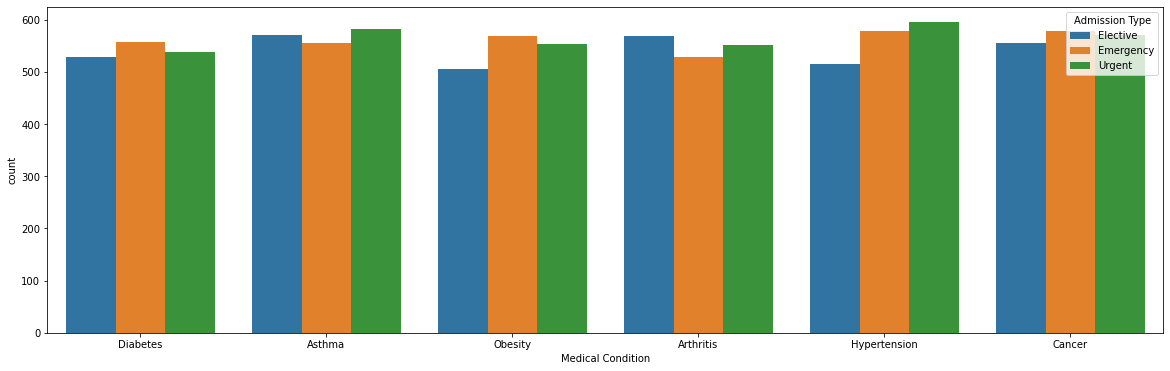

In [10]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(x=df['Medical Condition'],hue=df['Admission Type'])

In [11]:
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

In [12]:
print('Abnormal',3456/(10000))
print('Inconclusive',3277/(10000))
print('Normal',3267/(10000))

Abnormal 0.3456
Inconclusive 0.3277
Normal 0.3267


(array([ 981.,  958.,  976., 1103., 1034.,  995.,  962.,  996.,  968.,
        1027.]),
 array([ 1000.18083702,  5899.75298164, 10799.32512626, 15698.89727088,
        20598.4694155 , 25498.04156012, 30397.61370474, 35297.18584936,
        40196.75799398, 45096.3301386 , 49995.90228322]),
 <BarContainer object of 10 artists>)

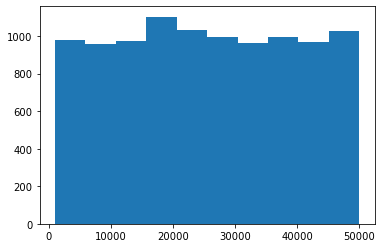

In [13]:
plt.hist(df['Billing Amount'])

In [14]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [15]:
df1=df1.drop(['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Room Number','Discharge Date'],axis=1)

In [16]:
encode=LabelEncoder()

In [19]:
df1['Gender']=encode.fit_transform(df1['Gender'])
df1['Blood Type']=encode.fit_transform(df1['Blood Type'])
df1['Medical Condition']=encode.fit_transform(df1['Medical Condition'])
df1['Admission Type']=encode.fit_transform(df1['Admission Type'])
df1['Medication']=encode.fit_transform(df1['Medication'])
df1['Test Results']=encode.fit_transform(df1['Test Results'])
df1['Billing Amount']=encode.fit_transform(df1['Billing Amount'])

In [20]:
df1

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,81,0,7,3,7439,0,0,1
1,35,1,6,1,9444,1,2,2
2,61,1,5,5,7329,1,2,2
3,49,1,5,1,4589,2,4,0
4,51,1,7,0,3469,2,3,2
...,...,...,...,...,...,...,...,...
9995,83,1,0,5,7883,0,1,0
9996,47,0,2,0,1007,1,1,2
9997,54,1,5,0,9901,0,1,2
9998,84,1,0,0,4995,2,4,2


In [22]:
df1.dtypes

Age                  int64
Gender               int32
Blood Type           int32
Medical Condition    int32
Billing Amount       int64
Admission Type       int32
Medication           int32
Test Results         int32
dtype: object

<AxesSubplot:>

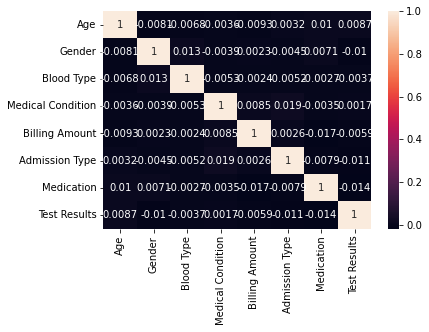

In [23]:
sns.heatmap(data=df1.corr(),annot=True)

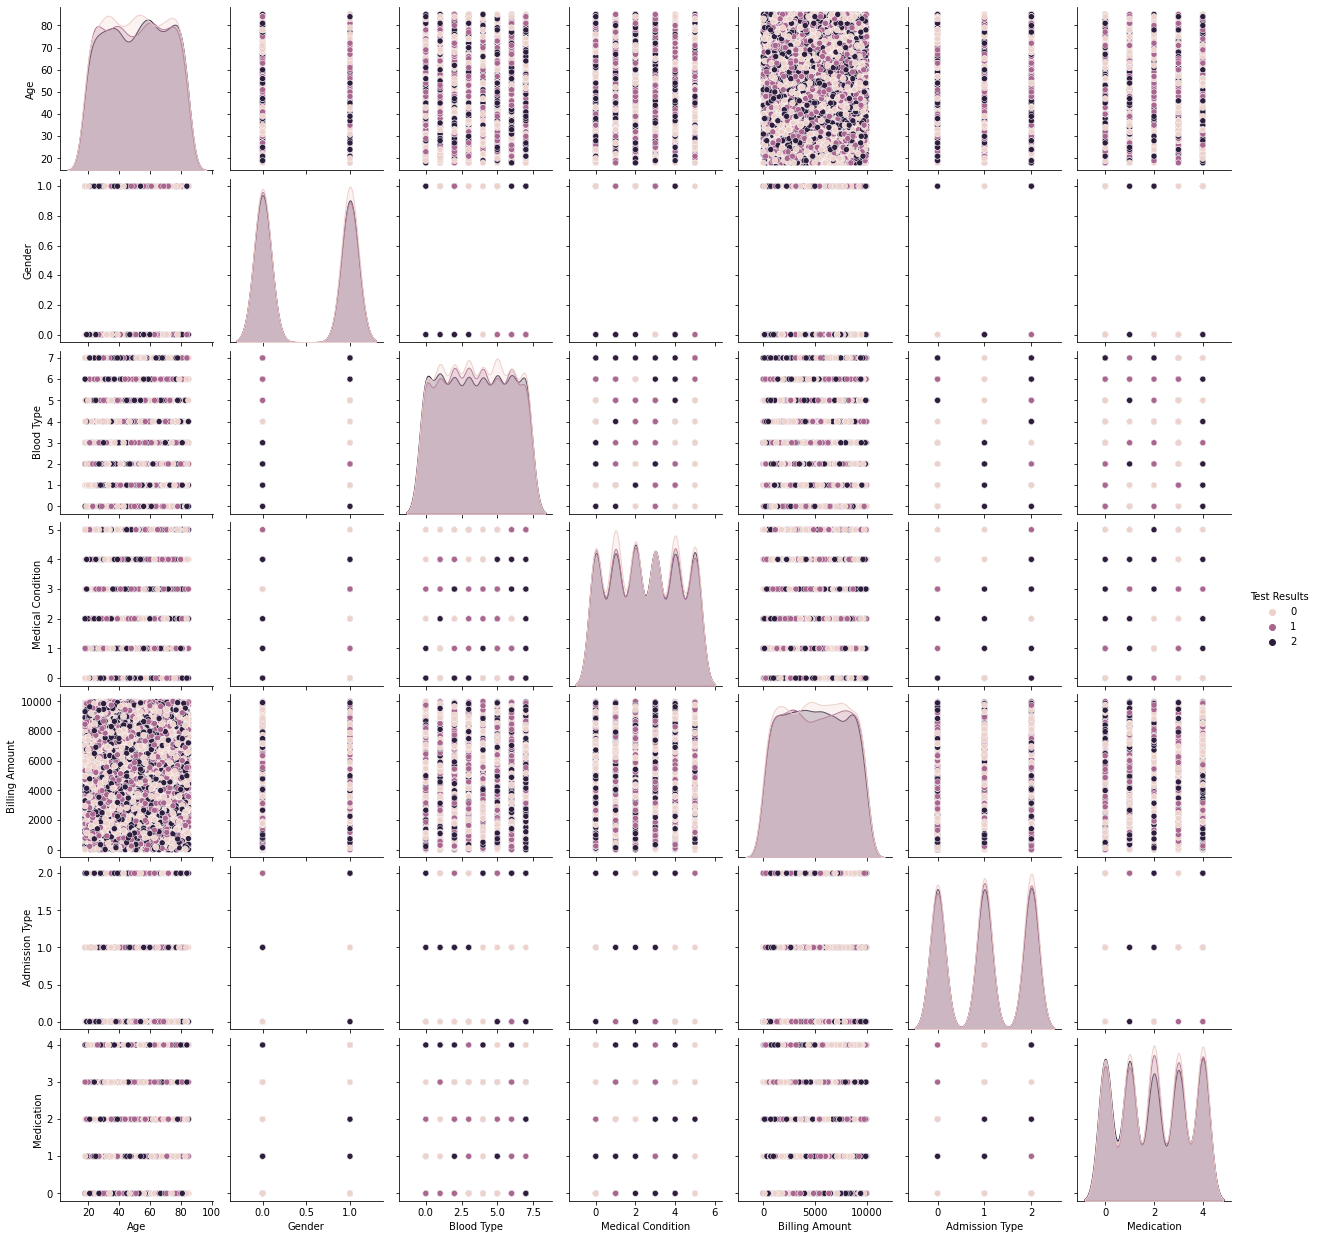

In [24]:
sns.pairplot(df1,hue="Test Results")

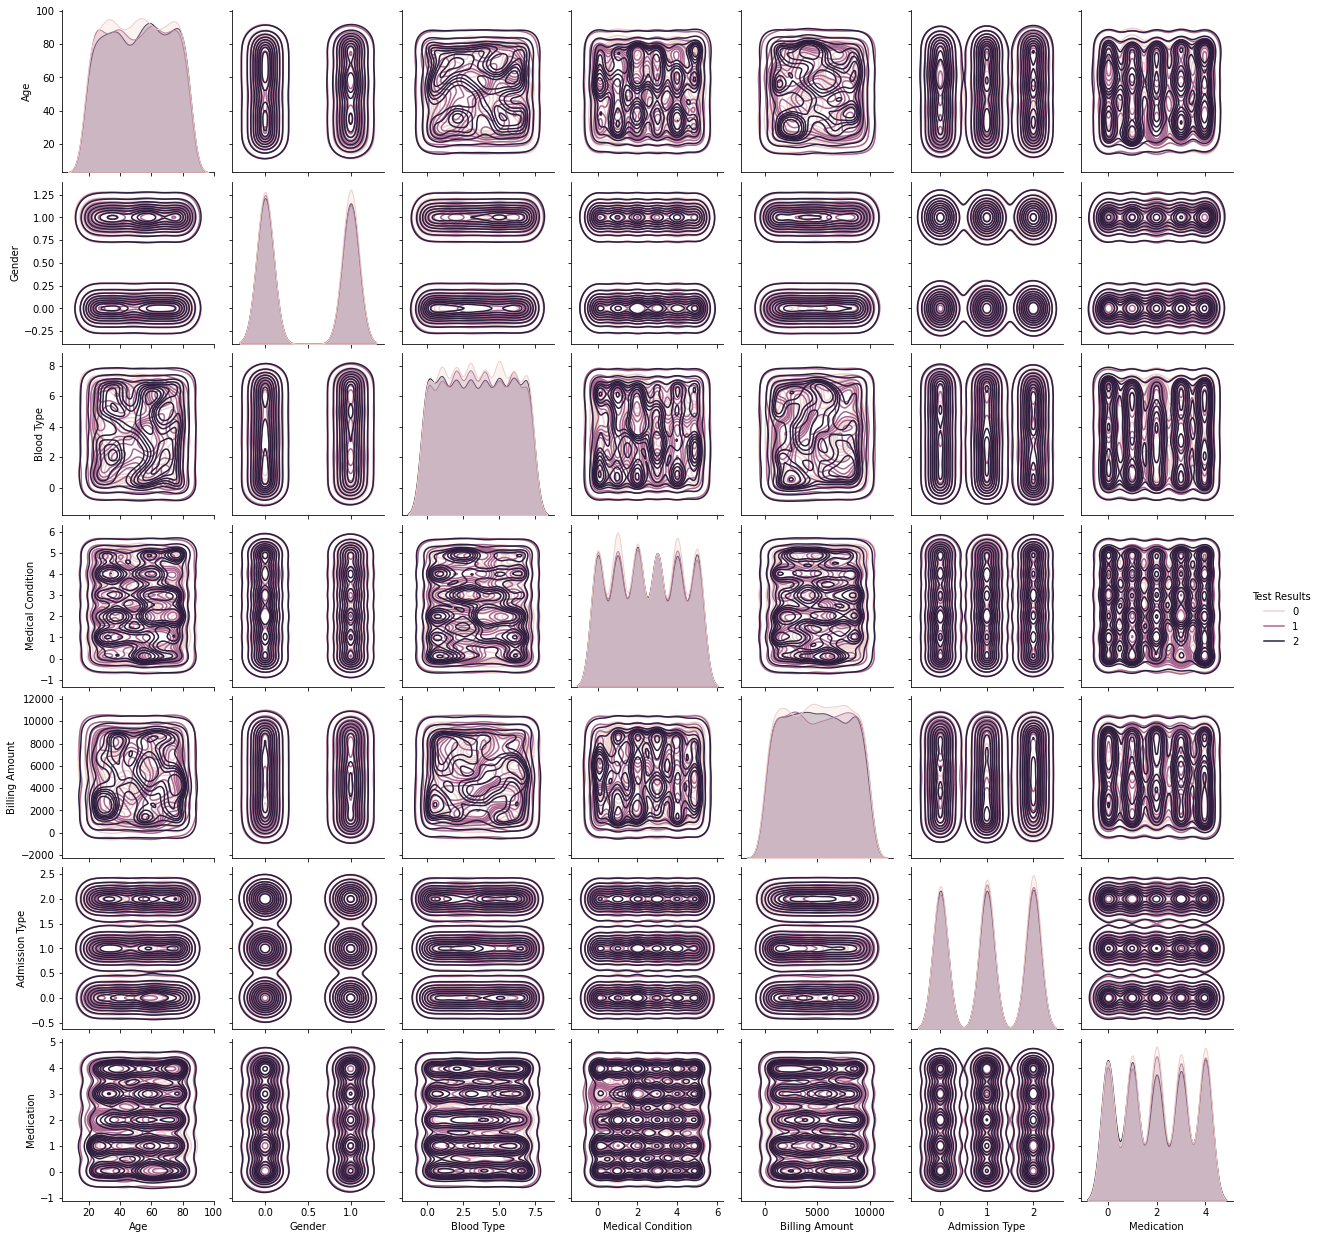

In [26]:
sns.pairplot(df1,hue="Test Results",kind='kde')

In [27]:
X=df1.drop(['Test Results'],axis=1)
y=df1['Test Results']

In [28]:
X

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication
0,81,0,7,3,7439,0,0
1,35,1,6,1,9444,1,2
2,61,1,5,5,7329,1,2
3,49,1,5,1,4589,2,4
4,51,1,7,0,3469,2,3
...,...,...,...,...,...,...,...
9995,83,1,0,5,7883,0,1
9996,47,0,2,0,1007,1,1
9997,54,1,5,0,9901,0,1
9998,84,1,0,0,4995,2,4


In [29]:
y

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int32

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 7)
(2000, 7)
(8000,)
(2000,)


In [32]:
minmax=MinMaxScaler()

In [33]:
X_train=minmax.fit_transform(X_train)
X_test=minmax.transform(X_test)

In [34]:
X_train

array([[0.01492537, 1.        , 0.14285714, ..., 0.40292088, 0.5       ,
        0.5       ],
       [0.28358209, 1.        , 0.        , ..., 0.93087926, 0.5       ,
        0.5       ],
       [0.05970149, 0.        , 0.57142857, ..., 0.04621386, 1.        ,
        0.75      ],
       ...,
       [0.94029851, 1.        , 0.71428571, ..., 0.77343203, 0.5       ,
        0.        ],
       [0.40298507, 0.        , 0.42857143, ..., 0.86005802, 0.5       ,
        0.        ],
       [0.85074627, 1.        , 0.71428571, ..., 0.01170351, 0.        ,
        0.25      ]])

In [35]:
X_test

array([[0.11940299, 1.        , 0.28571429, ..., 0.96468941, 0.        ,
        0.25      ],
       [0.92537313, 0.        , 0.        , ..., 0.09312794, 0.5       ,
        0.75      ],
       [0.74626866, 0.        , 0.28571429, ..., 0.51105332, 1.        ,
        0.25      ],
       ...,
       [0.97014925, 0.        , 0.85714286, ..., 0.92917875, 0.        ,
        0.25      ],
       [0.04477612, 1.        , 1.        , ..., 0.22586776, 0.5       ,
        0.75      ],
       [0.17910448, 1.        , 0.14285714, ..., 0.62638792, 0.        ,
        0.25      ]])

In [36]:
rf=RandomForestClassifier()

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred=rf.predict(X_test)

In [39]:
y_pred

array([0, 2, 0, ..., 0, 0, 0])

In [40]:
accuracy_score(y_test,y_pred)

0.353

In [41]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[275 210 221]
 [242 210 184]
 [225 212 221]]


<AxesSubplot:>

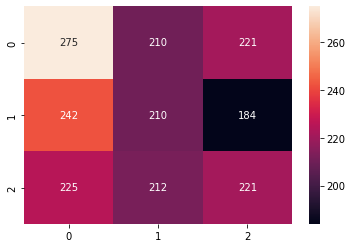

In [42]:
sns.heatmap(cm,annot=True,fmt='d')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38       706
           1       0.33      0.33      0.33       636
           2       0.35      0.34      0.34       658

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000

